In [1]:
print("hi")

hi


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider


In [2]:

def create_weights(sequence_length, center_size, center_weight, sigma_scale):
    x = np.arange(sequence_length)
    mu = sequence_length / 2
    sigma = center_size * sigma_scale
    
    gaussian = np.exp(-(x - mu)**2 / (2 * sigma**2))
    gaussian = (gaussian - gaussian.min()) / (gaussian.max() - gaussian.min())
    weights = 1 + (center_weight - 1) * gaussian
    
    return weights


In [7]:
weights.mean()

2.1279827235839504

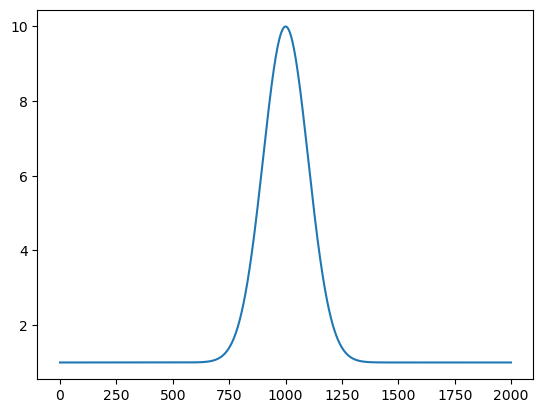

In [4]:
weights = create_weights(2000,500,10,0.2)
plt.plot(weights)

In [32]:
weights[750]

2.218017549129416

In [9]:
def plot_weights(sigma_scale, center_weight):
    sequence_length = 2000
    center_size = 500
    
    weights = create_weights(sequence_length, center_size, center_weight, sigma_scale)
    
    plt.figure(figsize=(12, 6))
    plt.plot(weights)
    plt.title(f"Weight Distribution (sigma_scale={sigma_scale:.2f}, center_weight={center_weight:.1f})")
    plt.xlabel("Sequence Position")
    plt.ylabel("Weight")
    plt.ylim(0, center_weight + 1)
    plt.axvline(x=250, color='r', linestyle='--', alpha=0.5)
    plt.axvline(x=750, color='r', linestyle='--', alpha=0.5)
    plt.text(500, 0.5, "Center 500", ha='center', va='bottom', color='r', alpha=0.5)
    plt.grid(True, alpha=0.3)
    plt.show()

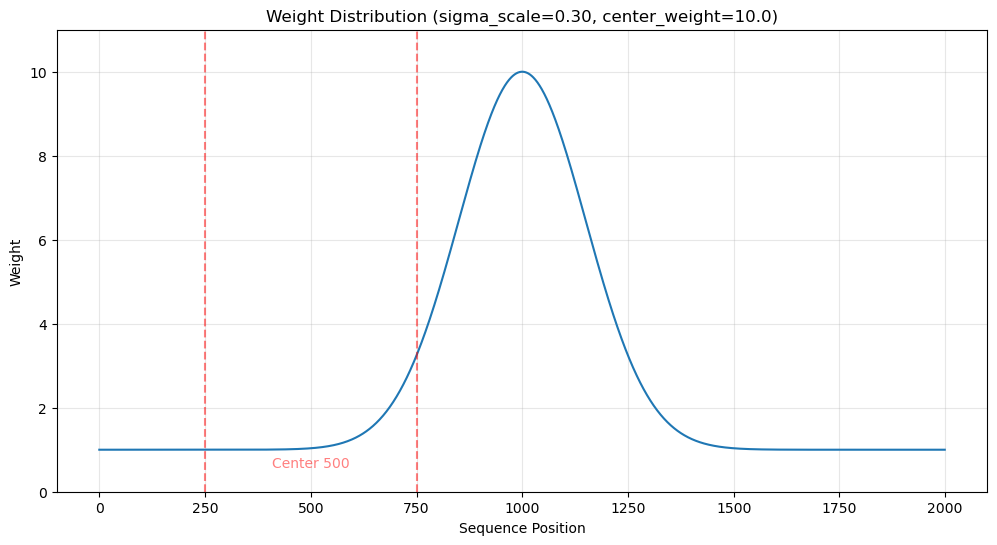

In [10]:
plot_weights(0.3,10)